# Набор данных прогноза инсульта
## Описание задачи и информация о датасете
По данным Всемирной организации здравоохранения (ВОЗ) инсульт является второй ведущей причиной смерти в мире, на него приходится примерно 11% от общего числа смертей.

Источник данных: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn   

# Чтение данных

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/sashatyurmina/machinelearning/main/healthcare-dataset-stroke-data.csv")

В таблице содержатся различные данные человека (где живет, масса тела, заболевания, работа и т.д.), которые могут повлиять на появление инсульта.
Посмотрим на размеры таблицы:
* количество строк - данные о конкретном человеке
* количество столбцов - признаки

In [3]:
data.shape

(5110, 12)

Первые 5 строк в таблице:

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Последние 5 строк в таблице:

In [5]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Имена столбцов (признаков):

In [6]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

+ id - идентификатор
+ gender - пол: мужской, женский, другой
+ age - возраст
+ hypertension - гипертония: 0, если у пациента нет гипертонии, 1, если у пациента гипертония
+ heart_disease - сердченые заболевания: 0, если у пациента нет никаких сердечных заболеваний, 1, если у пациента есть заболевание сердца
+ ever_married - когда-либо был женат: Нет или Да
+ work_type - тип работы: дети, государственная работа, Никогда не работавший, Частный или Самозанятый
+ Residence_type - Тип местожительства: Сельский или Городской
+ avg_glucose_level - средний уровень глюкозы в крови
+ bmi - индекс массы тела
+ smoking_status - статус курения: ранее курил, никогда не курил, курит или Неизвестно*
+ stroke - инсульт: 1, если у пациента был инсульт, или 0, если нет
* Примечание: "Неизвестно" в smoking_status означает, что информация недоступна для этого пациента

Требуется предсказать бинарный категориальный признак stroke по остальным признакам

Имена строк:

In [7]:
data.index

RangeIndex(start=0, stop=5110, step=1)

Типы признаков:

In [8]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Столбцы, имеющие тип 'Object' содержат категориальные значения. Приведём их к специальному типу, предназначенному для хранения категориальных значений.

In [9]:
data['gender'] = data['gender'].astype('category');

In [10]:
data['ever_married'] = data['ever_married'].astype('category');

In [11]:
data['work_type'] = data['work_type'].astype('category');

In [12]:
data['Residence_type'] = data['Residence_type'].astype('category');

In [13]:
data['smoking_status'] = data['smoking_status'].astype('category');

In [14]:
data.dtypes

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

# Визуализация данных и описательная статистика

Сводную информацию о признаках можем получить, вызвав метод describe, показывающий количество значений, средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

In [15]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных, а именно количество значений, количество уникальных значений, самое распространенные значение и частота наиболее распространенного значения.

In [16]:
data.describe(include=['category'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Диаграммы зависимости

Зависимость сердечного заболевания и курения:

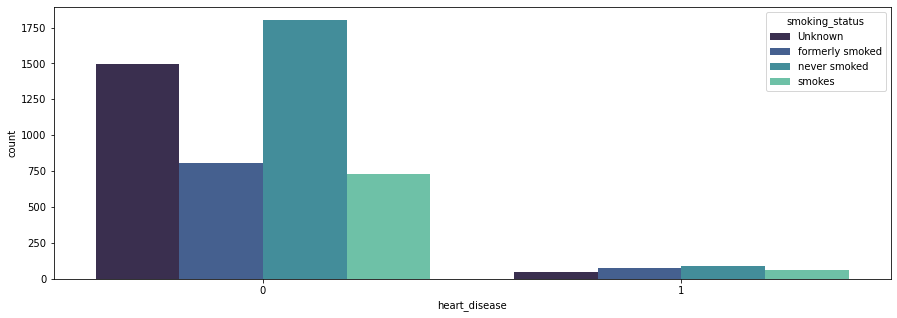

In [17]:
plt.figure(figsize=(15, 5))
sns.countplot(x='heart_disease', hue= 'smoking_status', data=data, palette='mako')
pass

Зависимость гипертонии и инсульта:

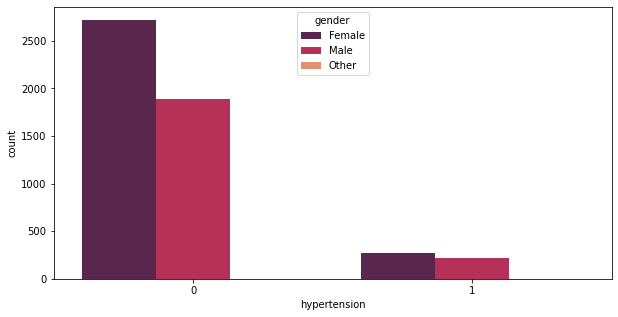

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='hypertension', hue= 'gender', data=data, palette='rocket')
pass

Зависимость уровня глюкозы в крови и места жительства:

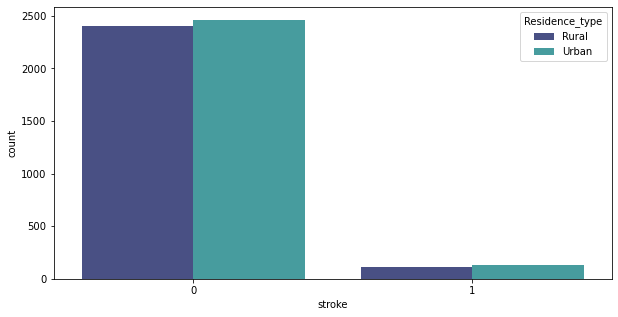

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='stroke', hue= 'Residence_type', data=data, palette='mako')
pass

График, показывающий индекс массы тела:

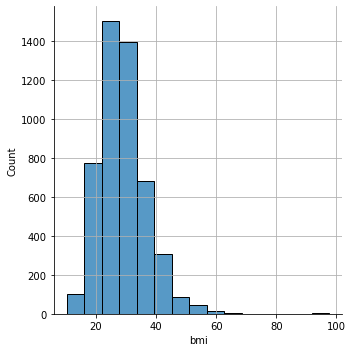

In [20]:
sns.displot(data['bmi'], bins=15)
plt.grid()
pass

Ящик с усами:

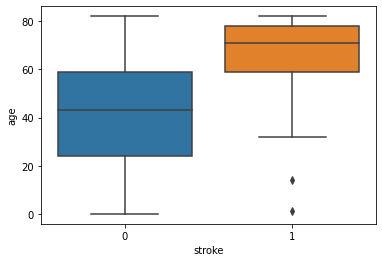

In [21]:
sns.boxplot(x=data["stroke"], y=data["age"]);
plt.show()

Скрипичный график:

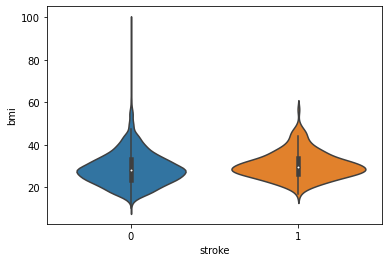

In [22]:
sns.violinplot(x=data["stroke"], y=data["bmi"])
pass

Корреляционная матрица:

Построим матрицу для числовых признаков:

In [23]:
corr_mat = data.corr()
corr_mat

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


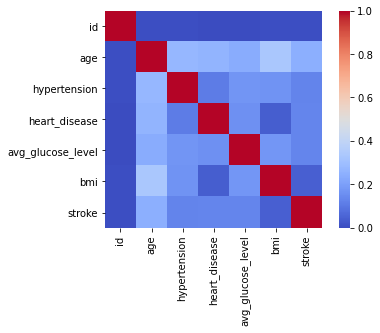

In [24]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Видно, что почти каждый признак не зависит друг от друга. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции.

# Обработка пропущенных значений

In [25]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Пропущенные значения в столбце bmi заполним медианами:

In [26]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [27]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Пропущенных значений не осталось

In [28]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [29]:
data.describe(include=['category'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Векторизация, обработка категориальных признаков

Проведем векторизацию категориальных (номинальных) признаков. Признак stroke - категориальный, представленный в виде чисел. Не будем пока включать его ни в categorical_columns, ни в numerical_columns

In [30]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns= ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [31]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['ever_married', 'Residence_type']
nonbinary_columns= ['gender', 'work_type', 'smoking_status']


К небинарными признакам применим метод векторизации. Изобразим сначала для признака gender:

In [32]:
data['gender'].unique()

['Male', 'Female', 'Other']
Categories (3, object): ['Male', 'Female', 'Other']

Заменим один признак gender на три признака: gender_Female, gender_Male, gender_Other.

* Если признак gender принимает значение Female, то признак gender_Female принимает значение 1, а все остальные 0
* Если признак gender принимает значение Male, то признак gender_Male принимает значение 1, а все остальные 0
* Если признак gender принимает значение Other, то признак gender_Other принимает значение 1, а все остальные 0

Такую векторизацию осуществляет в pandas метод get_dummies.

In [33]:
data[nonbinary_columns]

,gender,work_type,smoking_status
0,Male,Private,formerly smoked
1,Female,Self-employed,never smoked
2,Male,Private,never smoked
3,Female,Private,smokes
4,Female,Self-employed,never smoked
...,...,...,...
5105,Female,Private,never smoked
5106,Female,Self-employed,never smoked
5107,Female,Self-employed,never smoked
5108,Male,Private,formerly smoked


In [34]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [35]:
len(data_categorical.columns)

12

# Нормализация признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению. Не будем нормализовать целевой признак stroke

In [36]:
numerical_columns_exept_stroke = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [37]:
data_numerical_exept_stroke = data[numerical_columns_exept_stroke]
data_numerical_exept_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


In [38]:
data_numerical_exept_stroke = (data_numerical_exept_stroke - data_numerical_exept_stroke.mean(axis = 0))/data_numerical_exept_stroke.std(axis = 0)

In [39]:
data_numerical_exept_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-1.278277e-16,-7.276211e-16,3.834984e-15,3.465047e-16,3.674925e-15,-9.830601e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.722489e+00,-1.908074e+00,-3.285697e-01,-2.389234e-01,-1.126848e+00,-2.410791e+00
25%,-8.872898e-01,-8.060363e-01,-3.285697e-01,-2.389234e-01,-6.382598e-01,-6.574445e-01
50%,1.957169e-02,7.842450e-02,-3.285697e-01,-2.389234e-01,-3.149637e-01,-9.897124e-02
75%,8.583503e-01,7.859932e-01,-3.285697e-01,-2.389234e-01,1.753909e-01,5.114531e-01
max,1.721135e+00,1.714677e+00,3.042899e+00,4.184622e+00,3.656787e+00,8.927516e+00


Соединяем все в одну таблицу:

In [40]:
data = pd.concat((data['stroke'], data_numerical_exept_stroke, data_categorical), axis = 1)
print(data.shape)

(5110, 19)


In [41]:
data.describe()

,stroke,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.048728,-1.278277e-16,-7.276211e-16,3.834984e-15,3.465047e-16,3.674925e-15,-9.830601e-15,0.585910,0.413894,0.000196,0.128571,0.004305,0.572407,0.160274,0.134442,0.302153,0.173190,0.370254,0.154403
std,0.215320,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.492612,0.492578,0.013989,0.334758,0.065480,0.494778,0.366896,0.341160,0.459236,0.378448,0.482920,0.361370
min,0.000000,-1.722489e+00,-1.908074e+00,-3.285697e-01,-2.389234e-01,-1.126848e+00,-2.410791e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.872898e-01,-8.060363e-01,-3.285697e-01,-2.389234e-01,-6.382598e-01,-6.574445e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.957169e-02,7.842450e-02,-3.285697e-01,-2.389234e-01,-3.149637e-01,-9.897124e-02,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,8.583503e-01,7.859932e-01,-3.285697e-01,-2.389234e-01,1.753909e-01,5.114531e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.721135e+00,1.714677e+00,3.042899e+00,4.184622e+00,3.656787e+00,8.927516e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Разбиение данных на обучающуюю и тестовую выборки

Используем все входные признаки, кроме stroke и id (id - признак дается автоматически и никак не влияет на stroke)

In [42]:
data.drop(['id'], axis=1)
x = np.array(data.drop(['stroke'], axis=1))
y = np.array(data['stroke'])

In [43]:
print(x.shape)
print(y.shape)
N, d = x.shape

(5110, 18)
(5110,)


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3832 1278


# Обучение классификатора

In [45]:
from sklearn.neural_network import MLPClassifier

In [46]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [47]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 6.63 s


MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

Проверяем качество классификатора:

In [48]:
y_train_pred = mlp_model.predict(X_train) 
y_test_pred = mlp_model.predict(X_test)

## Ошибки на обучающей и тестовой выборках:

In [49]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.10093896713615023


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_train, y_train_pred)

1.0

In [52]:
accuracy_score(y_test, y_test_pred)

0.8990610328638498

Точность на тренировочной больше, чем на тестовой - это переобучение

## Подбор гиперпараметров 

Подберем оптимальное значение параметра регуляризации alpha

In [53]:
alpha_arr = np.logspace(-3, 2, 16)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

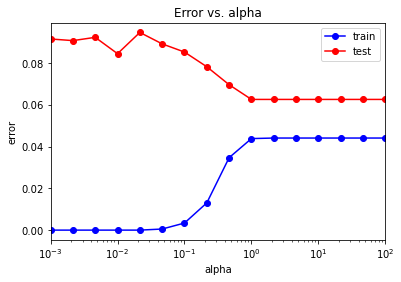

In [54]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

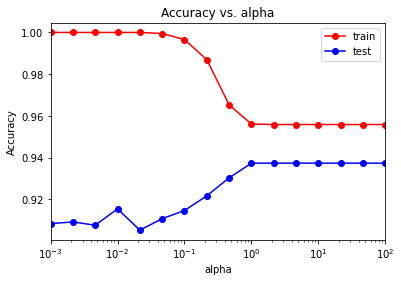

In [55]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Из графика видно, что наблюдается переобучение. При значениях, больших 1, практически не наблюдается изменение метрики.

Минимальное значение ошибки:

In [56]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.06259780907668232


Оптимальное значение alpha:

In [57]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[  1.           2.15443469   4.64158883  10.          21.5443469
  46.41588834 100.        ]


In [58]:
alpha_opt = alpha_opt[0]

# Подбор числа нейронов

Будем искать число нейронов при оптимальном alpha

In [59]:
neuron_count_array = np.linspace(1, 800, 24).astype(int)
test_error = []
train_error = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_opt,
        hidden_layer_sizes=(neuron_count,),
        solver='lbfgs',
        activation ='logistic',
        max_iter=1000,
        random_state = 42
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    test_error.append(np.mean(y_test != y_test_pred))
    train_error.append(np.mean(y_train != y_train_pred))

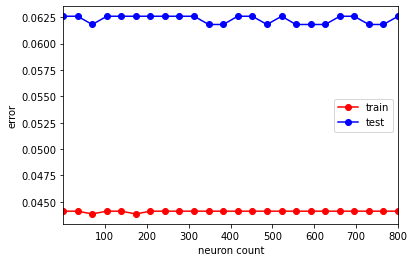

In [60]:
plt.plot(neuron_count_array, train_error, 'r-o', label='train')
plt.plot(neuron_count_array, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

In [61]:
min_test_error = np.min(test_error)
neuron_count_optimal = neuron_count_array[test_error == min_test_error][0]
print('Optimal neuron count: {}'.format(neuron_count_optimal))

Optimal neuron count: 70


При значенииях, больших, чем 70 - значение метрики практически не изменяется. На графики видны небольшие колебания, но они достаточно незначительны.

Обучим классификатор при оптимальном значении количества нейронов:

In [62]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_count_optimal,),solver='lbfgs',
                            activation='logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.04384133611691023
0.061815336463223784


In [63]:
accuracy_score(y_train, y_train_pred)

0.9561586638830898

In [64]:
accuracy_score(y_test, y_test_pred)

0.9381846635367762

# Вывод

* Изначально у тренировочной выборки метрика была равна 1, поэтому было переобучение
* При изменении параметра регуляризации мы смогли изменить точность выборок. При выборе оптимального параметра alpha мы избавились от эффекта переобучения, повысили точность тестовой выборки и уменьшили разность между точностью выборок.
* Подбор оптимального числа нейронов при оптимальном значении регуляции помог немного повысить точность на тестовой выборке